![](https://storage.googleapis.com/kaggle-competitions/kaggle/24191/logos/header.png?t=2020-11-24-14-43-27)

# Welcome
The [Acea Group](https://www.gruppo.acea.it/en) is one of the leading Italian multiutility operators. Listed on the Italian Stock Exchange since 1999, the company manages and develops water and electricity networks and environmental services. Acea is the foremost Italian operator in the water services sector supplying 9 million inhabitants in Lazio, Tuscany, Umbria, Molise, Campania.



# Evaluation 
This is an Analytics competition where your task is to create a Notebook that best addresses the Evaluation criteria below. Submissions should be shared directly with host and will be judged by the Acea Group based on how well they address:

**Methodology/Completeness (min 0 points, max 5 points)**

- Are the statistical models appropriate given the data?
- Did the author develop one or more machine learning models?
- Did the author provide a way of assessing the performance and accuracy of their solution?
- What is the Mean Absolute Error (MAE) of the models?
- What is the Root Mean Square Error (RMSE) of the models?

**Presentation (min 0 points, max 5 points)**

- Does the notebook have a compelling and coherent narrative?
- Does the notebook contain data visualizations that help to communicate the author’s main points?
- Did the author include a thorough discussion on the intersection between features and their prediction? For example between rainfall and amount/level of water.
- Was there discussion of automated insight generation, demonstrating what factors to take into account?
- Is the code documented in a way that makes it easy to understand and reproduce?
- Were all external sources of data made public and cited appropriately?

**Application (min 0 points, max 5 points)**

- Is the provided model useful/able to forecast water availability in terms of level or water flow in a time interval of the year?
- Is the provided methodology applicable also on new datasets belong to another waterbody?

- Winners announced: **March 10, 2021**



#!

# 1. Packages

In [19]:
# Base 
# -----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Missing Value
# -----------------------------------
#!pip install missingno
import missingno as msno

# Configuration
# -----------------------------------
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

from termcolor import colored

In [20]:
#'https://storage.googleapis.com/newagent-ahdsra.appspot.com/map.html'

# 2. Data

In [21]:
# Import
aq_auser = pd.read_csv("Data/Aquifer_Auser.csv")
aq_doganella = pd.read_csv("Data/Aquifer_Doganella.csv")
aq_luco = pd.read_csv("Data/Aquifer_Luco.csv")
aq_petrignago = pd.read_csv("Data/Aquifer_Petrignano.csv")
#lakeBilancino = pd.read_csv("Data/Lake_Bilancino.csv")
#riverArno = pd.read_csv("Data/River_Arno.csv")
#ws_Amiata = pd.read_csv("Data/Spring_Amiata.csv")
#ws_Lupa = pd.read_csv("Data/Spring_Lupa.csv")
#ws_Madonna = pd.read_csv("Data/Spring_Madonna_di_Canneto.csv")

print("All files uploade successfully.")


All files uploade successfully.


# 3. Data Analysis by Set

 ###  3.1 Aquifer - Auser

In [22]:
print(aq_auser.shape)

(8154, 27)


In [23]:
# Convert 'Date' to datetime if not already
aq_auser["Date"] = pd.to_datetime(aq_auser['Date'], dayfirst=True)

# Ensure the DataFrame is sorted by 'Date' to maintain time series order
aq_auser = aq_auser.sort_values(by="Date").reset_index(drop=True)

# Identify columns that contain 'Depth'
depth_columns = [col for col in aq_auser.columns if 'Depth' in col]

# Find the first row where all 'Depth' columns are non-NaN
first_valid_index = aq_auser.dropna(subset=depth_columns, how='any').index.min()

# Drop all rows above the identified row
aq_auser = aq_auser.loc[first_valid_index:].reset_index(drop=True)

# Display the first few rows to verify the changes
aq_auser.head(3)

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,Depth_to_Groundwater_LT2,Depth_to_Groundwater_SAL,Depth_to_Groundwater_PAG,Depth_to_Groundwater_CoS,Depth_to_Groundwater_DIEC,Temperature_Orentano,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,2011-05-17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-12.97,-5.92,-2.34,-6.22,-3.79,16.05,12.80,17.20,17.45,-9936.00,-16377.12,-12823.49,0.00,0.00,0.17,-1.04
1,2011-05-18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-12.93,-5.93,-2.46,-6.27,-3.80,17.20,15.25,19.00,19.00,-9936.00,-16377.12,-12823.49,0.00,0.00,0.18,-1.04
2,2011-05-19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-12.92,-5.95,-2.41,-6.32,-3.80,19.25,15.35,19.95,20.10,-9936.00,-16377.12,-12823.49,0.00,0.00,0.16,-1.04


In [24]:
# List missing values within each column
aq_auser.isna().sum()

Date                                         0
Rainfall_Gallicano                           0
Rainfall_Pontetetto                          0
Rainfall_Monte_Serra                         6
Rainfall_Orentano                            0
Rainfall_Borgo_a_Mozzano                     0
Rainfall_Piaggione                           0
Rainfall_Calavorno                           0
Rainfall_Croce_Arcana                        0
Rainfall_Tereglio_Coreglia_Antelminelli      0
Rainfall_Fabbriche_di_Vallico                0
Depth_to_Groundwater_LT2                   381
Depth_to_Groundwater_SAL                   128
Depth_to_Groundwater_PAG                   391
Depth_to_Groundwater_CoS                   398
Depth_to_Groundwater_DIEC                  195
Temperature_Orentano                         0
Temperature_Monte_Serra                      0
Temperature_Ponte_a_Moriano                  0
Temperature_Lucca_Orto_Botanico              0
Volume_POL                                   0
Volume_CC1   

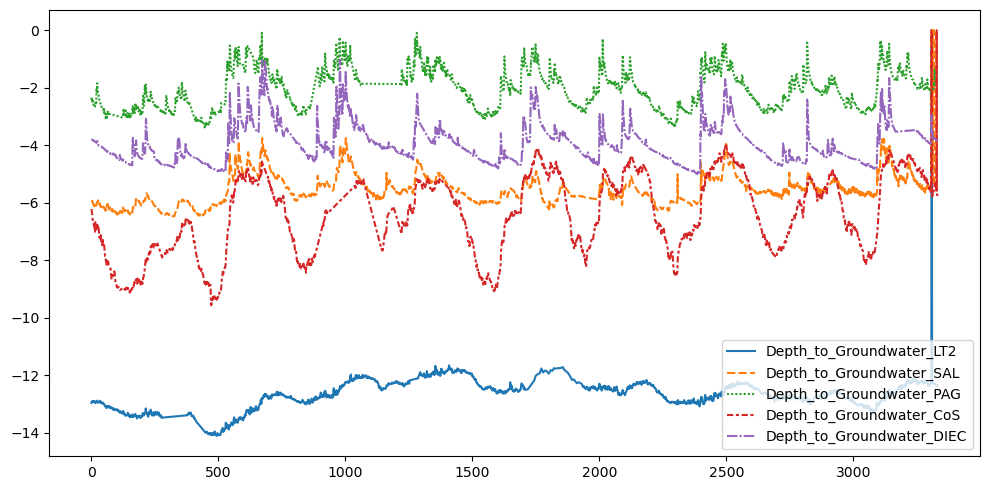

In [25]:
# Filter columns that contain 'Depth' in their names
depth_columns = [col for col in aq_auser.columns if 'Depth' in col]
depth_to_ground = aq_auser[depth_columns]

#Visualize Target variables
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = depth_to_ground)
plt.tight_layout()
plt.legend(loc="lower right")  # This positions the legend in the lower right corner
plt.legend(loc="lower right")  # This positions the legend in the lower right corner
plt.show()

In [26]:
# pip install torch torchvision torchaudio

In [27]:
import torch
print(torch.cuda.is_available())

True


In [28]:
#conda install pytorch pytorch-cuda=11.8 -c pytorch -c nvidia

In [29]:
#conda update -n base -c defaults conda
#conda install numba cudatoolkit pyculib

In [30]:
aq_auser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     3333 non-null   datetime64[ns]
 1   Rainfall_Gallicano                       3333 non-null   float64       
 2   Rainfall_Pontetetto                      3333 non-null   float64       
 3   Rainfall_Monte_Serra                     3327 non-null   float64       
 4   Rainfall_Orentano                        3333 non-null   float64       
 5   Rainfall_Borgo_a_Mozzano                 3333 non-null   float64       
 6   Rainfall_Piaggione                       3333 non-null   float64       
 7   Rainfall_Calavorno                       3333 non-null   float64       
 8   Rainfall_Croce_Arcana                    3333 non-null   float64       
 9   Rainfall_Tereglio_Coreglia_Antelminelli  

### I. Handling Missing Values for feature columns.

Missing values are handled at each column level using Linear Interopolation.

In [13]:
# Set 'Date' as the index
aq_auser.set_index('Date', inplace=True)

# Apply linear interpolation to all columns, assuming other columns are of float64 type. This will automatically skip the 'Date' column 
aq_auser.interpolate(method='linear', limit_direction='both', inplace=True)

# Note: 'limit_direction='both'' is included to demonstrate control over interpolation direction, with out interpolating edge cases

In [14]:
aq_auser.describe()

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,Depth_to_Groundwater_LT2,Depth_to_Groundwater_SAL,Depth_to_Groundwater_PAG,Depth_to_Groundwater_CoS,Depth_to_Groundwater_DIEC,Temperature_Orentano,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,5.00,3.55,3.89,3.16,4.80,4.07,4.63,3.06,4.21,5.91,-12.67,-5.53,-2.05,-6.40,-3.94,15.34,11.84,10.33,15.90,-7997.94,-16183.10,-11285.63,-3995.05,-3372.18,0.29,-0.80
std,15.08,10.26,10.87,8.85,13.76,11.23,12.80,10.28,11.24,16.50,0.60,0.59,0.67,1.36,0.66,6.96,6.51,9.10,7.02,1806.29,1780.17,1556.59,2696.62,2496.30,0.23,0.55
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-14.12,-6.48,-3.38,-9.57,-4.99,-2.25,-7.85,-1.55,-1.15,-11638.08,-18601.92,-14103.94,-7757.26,-9497.77,0.00,-1.19
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-12.95,-5.90,-2.66,-7.47,-4.44,9.75,6.65,0.00,10.20,-9640.39,-17081.28,-12341.38,-6012.00,-4923.48,0.14,-1.06
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-12.64,-5.61,-2.01,-6.33,-4.07,15.20,11.45,10.20,15.75,-7964.35,-16453.15,-11441.95,-5102.42,-4087.93,0.21,-0.99
75%,2.00,1.00,1.40,1.00,1.80,1.40,2.00,1.40,2.00,2.80,-12.30,-5.26,-1.58,-5.24,-3.55,21.10,16.90,18.40,21.90,-6406.46,-15784.42,-10545.12,0.00,0.00,0.38,-0.87
max,318.80,146.60,152.20,108.80,176.60,123.80,209.00,285.00,147.20,197.00,0.00,0.00,-0.09,0.00,-1.03,30.95,28.10,30.65,30.35,-4114.67,-7149.79,-5569.30,0.00,0.00,1.87,3.69


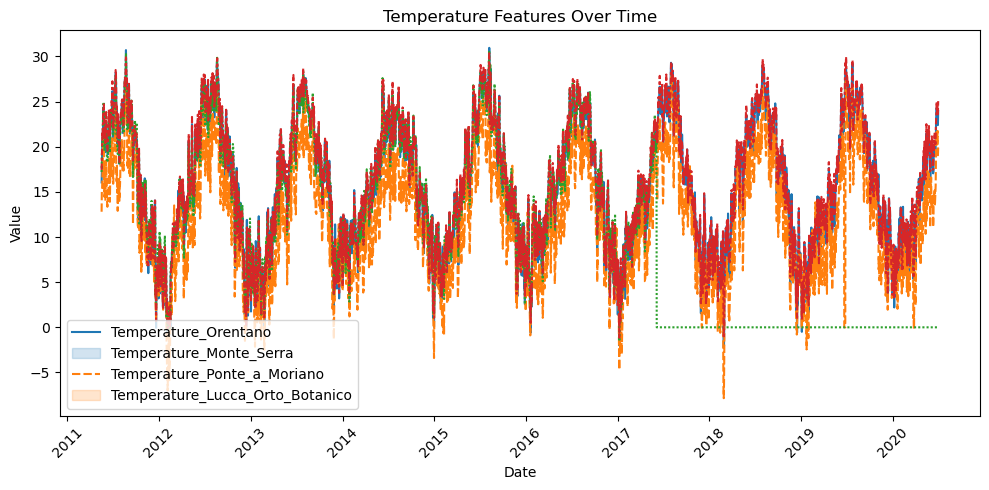

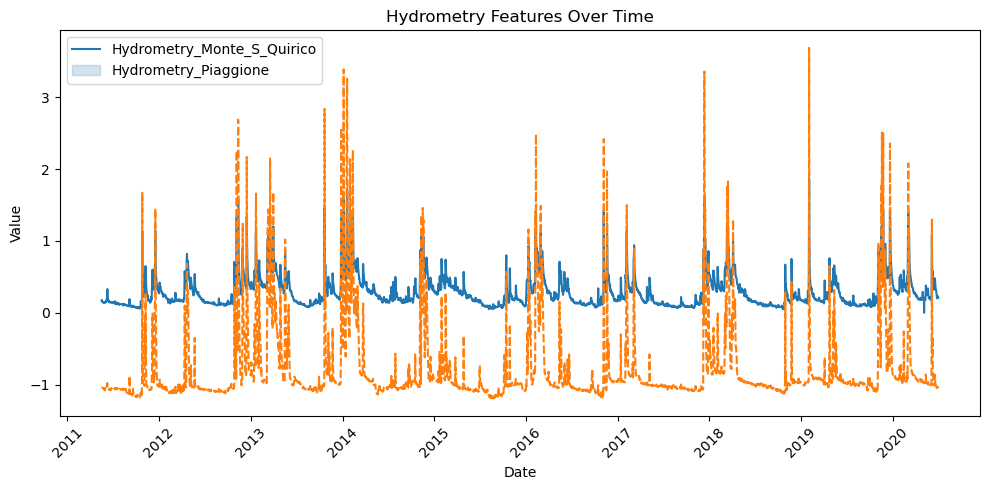

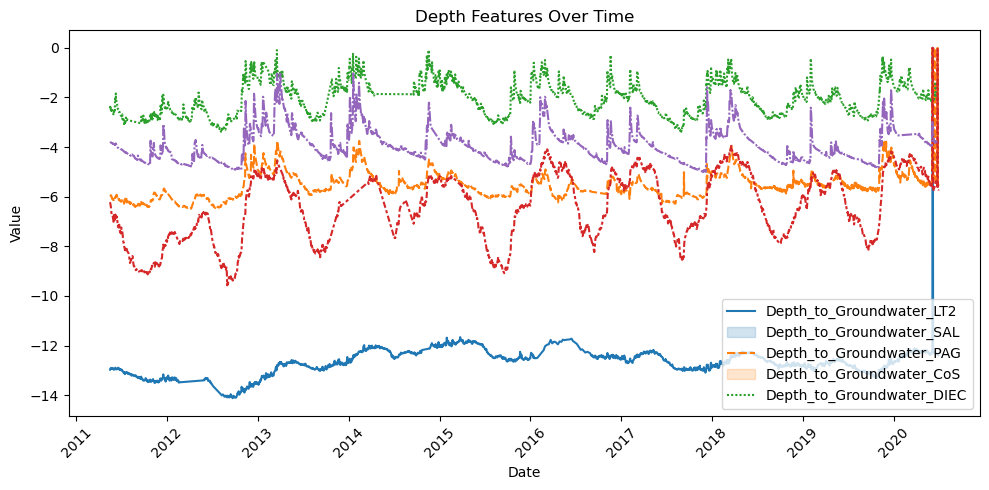

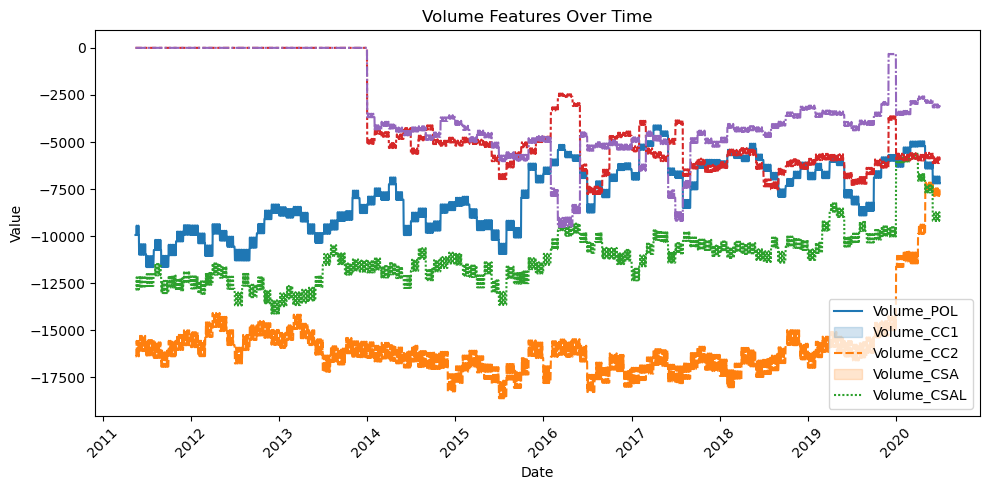

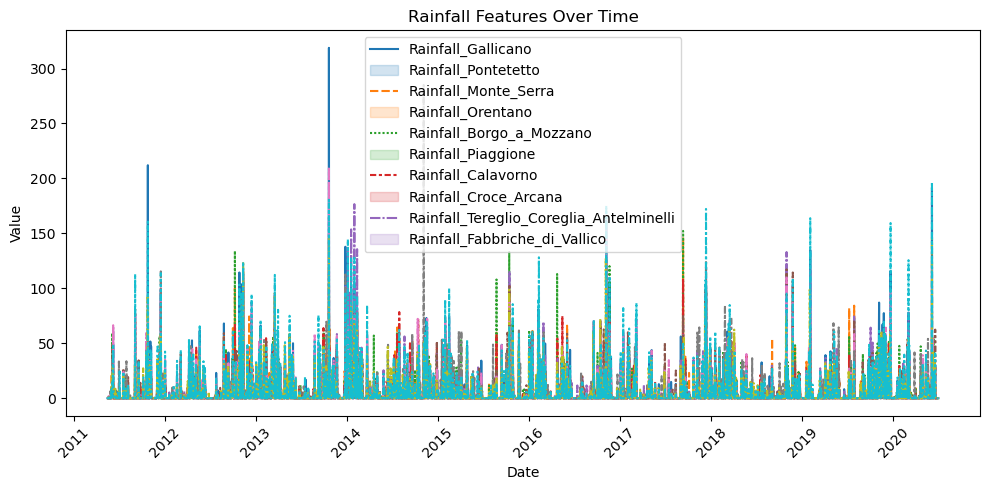

In [15]:
# Identify unique groups based on the first word before '_'
groups = set(col.split('_')[0] for col in aq_auser.columns if '_' in col)

# Plot each group in a separate figure
for group in groups:
    # Filter columns for the current group
    group_columns = [col for col in aq_auser.columns if col.startswith(group + '_')]
    group_data = aq_auser[group_columns]
    
    # Plotting
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=group_data)
    
    # Setting title and legend
    plt.title(f'{group} Features Over Time')
    plt.legend(group_columns, loc="best")  # Adjust legend location as needed
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.xticks(rotation=45)  # Rotate date labels for better readability
    plt.tight_layout()
    plt.show()


## (SEEKING INPUT) Is this analysis appropriate SO FAR?

### *Note: Smooth data using resampling to extract more information*.


# What is the best approach if any to use resampling and is this done after the stationary analysis step? (SEEKING INPUT ON NEXT STEPS)

Resampled all columns successfully.


### II. Stationarity in features for a time series is essential 

Going with Average of Depth_Ground Water.

- What is the trend?
- What about Seasonality?
- Explore Variability, Outliers, and inflection Points

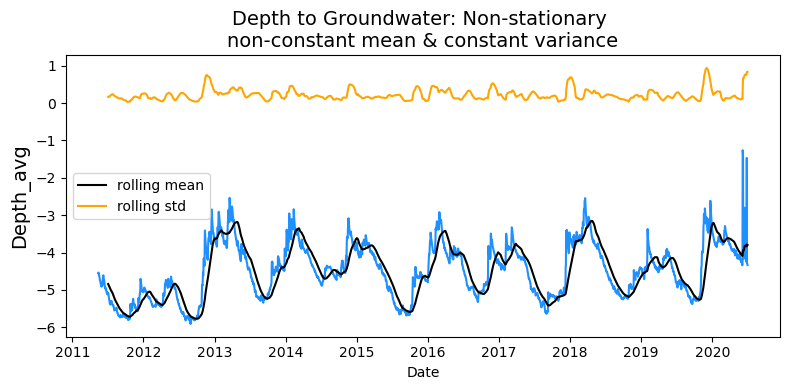

In [64]:
# A year has 52 weeks (52 weeks * 7 days per week) approx.
rolling_window = 52
f, ax = plt.subplots(figsize=(8, 4))

# Using auser_avg DataFrame, assuming its index is 'Date'
sns.lineplot(x=auser_avg.index, y=auser_avg['Depth_avg'], ax=ax, color='dodgerblue')
sns.lineplot(x=auser_avg.index, y=auser_avg['Depth_avg'].rolling(rolling_window).mean(), ax=ax, color='black', label='rolling mean')
sns.lineplot(x=auser_avg.index, y=auser_avg['Depth_avg'].rolling(rolling_window).std(), ax=ax, color='orange', label='rolling std')
ax.set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & constant variance', fontsize=14)
ax.set_ylabel(ylabel='Depth_avg', fontsize=14)

plt.tight_layout()
plt.show()

## The example below is what I did when I just used the average for each feature category/ I suspect this will need to be done for each column is this correct? Is there a better/more efficient way?

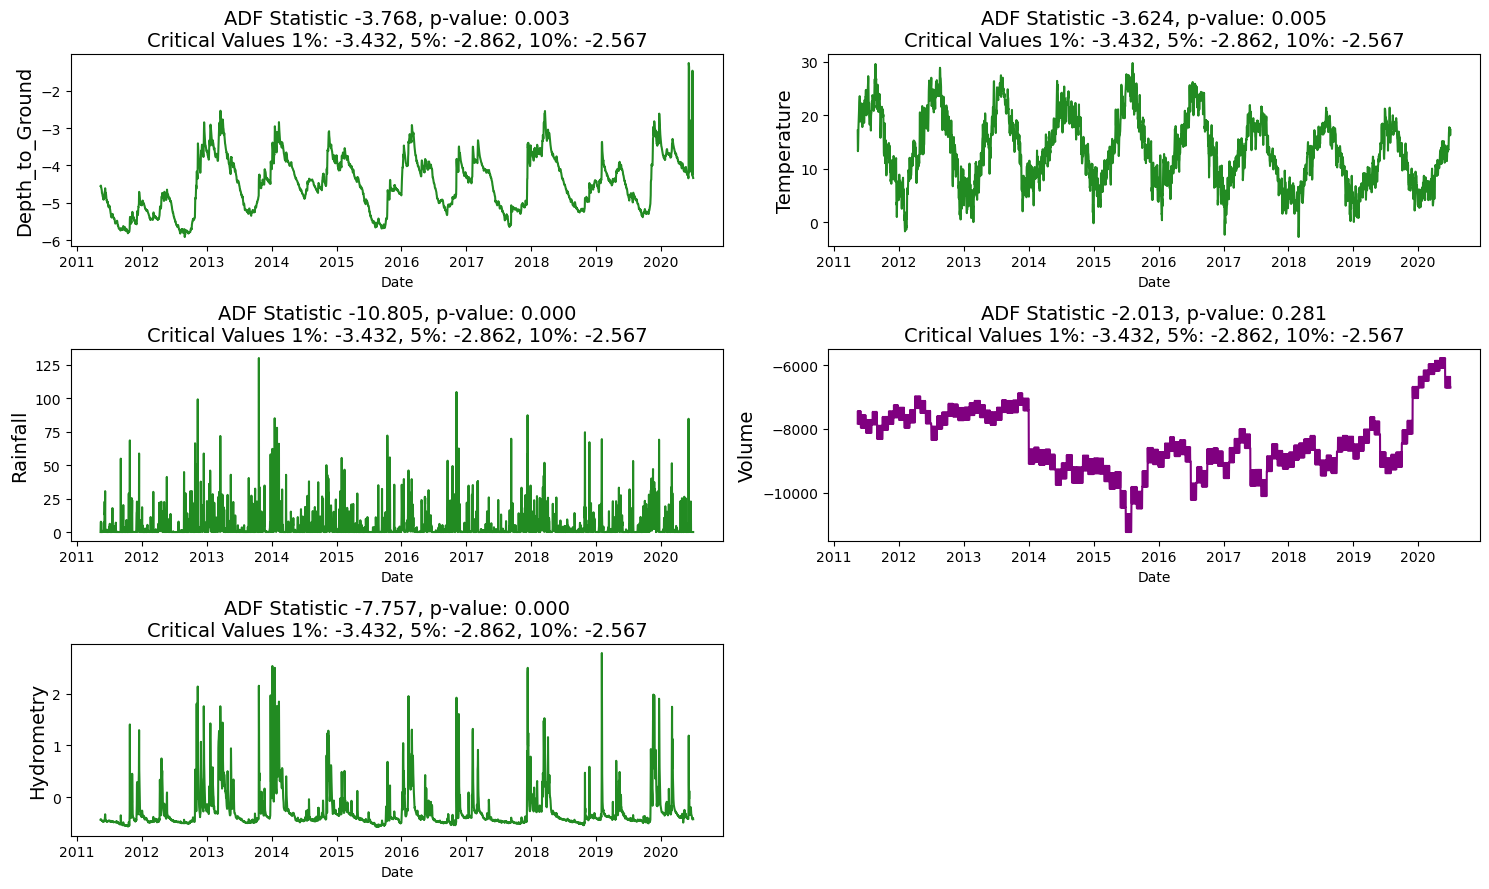

In [65]:
from statsmodels.tsa.stattools import adfuller

# Thanks to https://www.kaggle.com/iamleonie for this function!

# Adjusted function to use 'auser_avg' DataFrame where 'date' column is the index
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=series.index, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

# Assuming 'auser_avg' has these columns and the 'date' is its index
visualize_adfuller_results(auser_avg['Depth_avg'], 'Depth_to_Ground', ax[0, 0])
visualize_adfuller_results(auser_avg['Rainfall_avg'], 'Rainfall', ax[1, 0])
visualize_adfuller_results(auser_avg['Temperature_avg'], 'Temperature', ax[0, 1])
visualize_adfuller_results(auser_avg['Volume_avg'], 'Volume', ax[1, 1])
visualize_adfuller_results(auser_avg['Hydrometry_avg'], 'Hydrometry', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

## I did this for a feature that did not appear stationary.

#### Transformating the Volume Data

<Axes: xlabel='Volume_avg_log', ylabel='Density'>

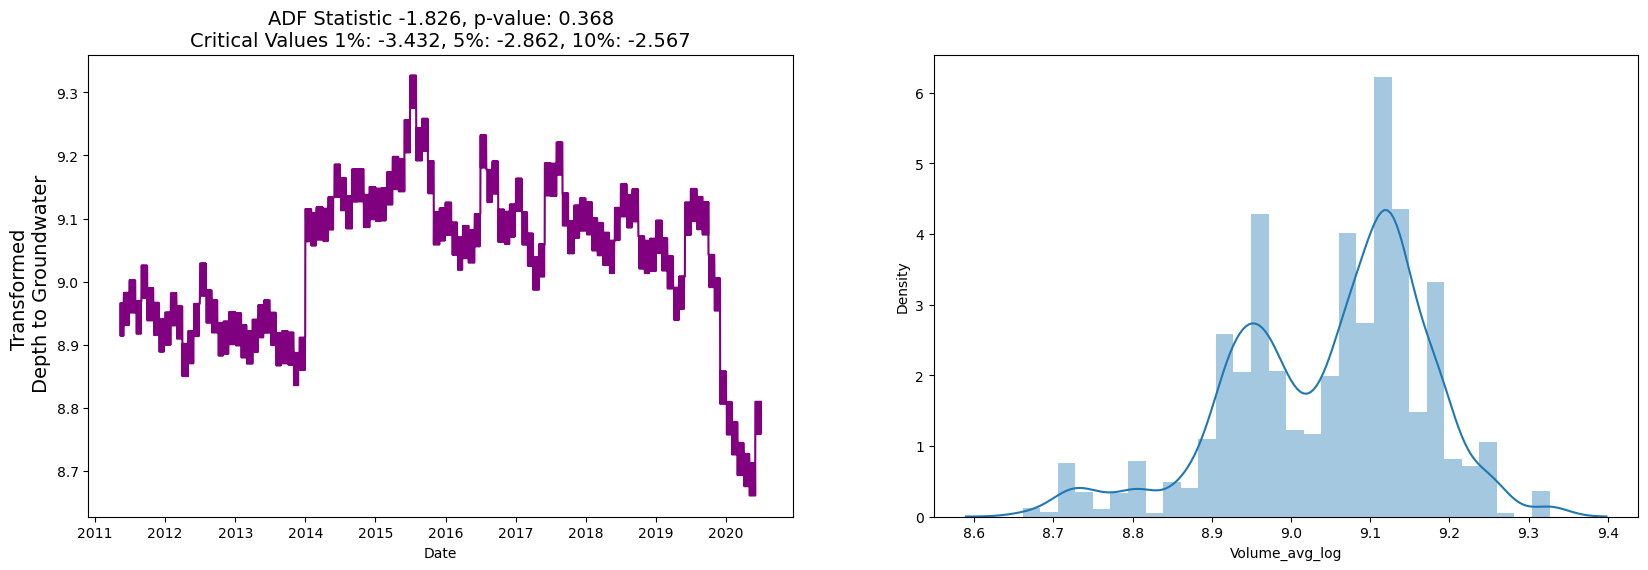

In [66]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
auser_avg['Volume_avg_log'] =  np.log(abs(auser_avg['Volume_avg']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(auser_avg['Volume_avg_log'], 'Transformed \n Depth to Groundwater', ax[0])

sns.distplot(auser_avg['Volume_avg_log'], ax=ax[1])

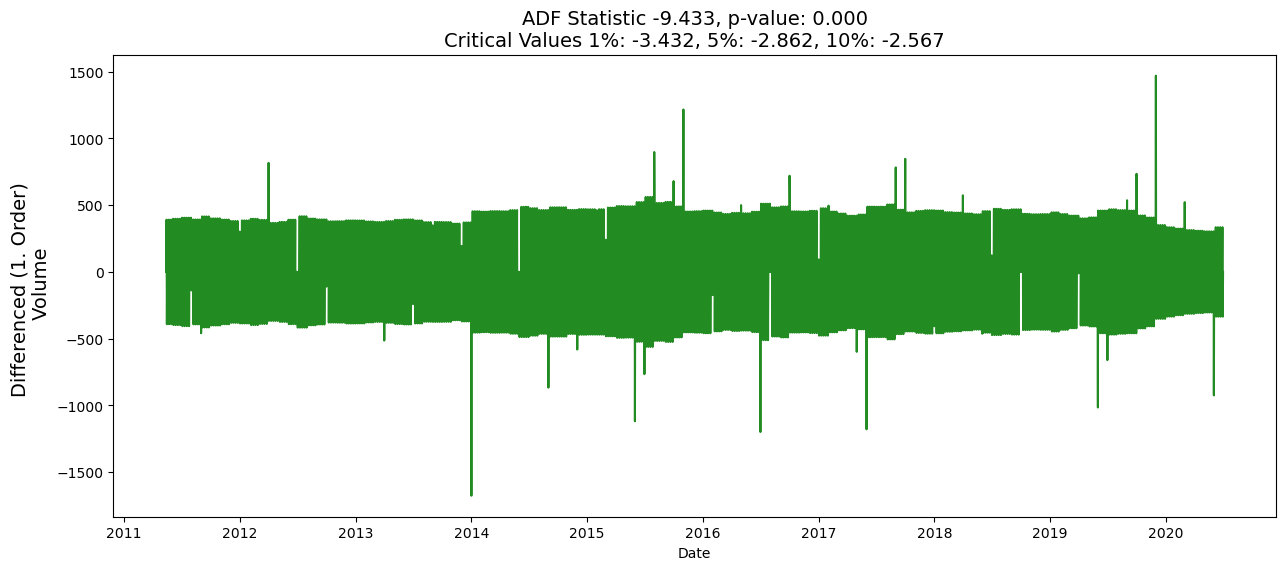

In [67]:
# First Order Differencing
auser_diff = np.diff(auser_avg['Volume_avg'])
auser_avg['Volume_avg_diff_1'] = np.append([0], auser_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(auser_avg['Volume_avg_diff_1'], 'Differenced (1. Order) \n Volume', ax)

### Feature Engineering

In [68]:
# Create a copy of the DataFrame with a new index
auser_eda = auser_avg.reset_index().copy()

# Rename the index column to 'Date'
auser_eda.rename(columns={'index': 'Date'}, inplace=True)

# Correct the typo and convert 'Date' column to datetime type
auser_eda['Date'] = pd.to_datetime(auser_eda['Date'])

# Extracting date-related features
auser_eda['year'] = pd.DatetimeIndex(auser_eda['Date']).year
auser_eda['month'] = pd.DatetimeIndex(auser_eda['Date']).month
auser_eda['day'] = pd.DatetimeIndex(auser_eda['Date']).day
auser_eda['day_of_year'] = pd.DatetimeIndex(auser_eda['Date']).dayofyear

# Use apply() to correctly extract 'week_of_year'
auser_eda['week_of_year'] = auser_eda['Date'].apply(lambda x: x.isocalendar()[1])

auser_eda['quarter'] = pd.DatetimeIndex(auser_eda['Date']).quarter
auser_eda['season'] = auser_eda['month'] % 12 // 3 + 1

# Display the first few rows of the specified columns
display_columns = ['Date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']
print(auser_eda[display_columns].head())

        Date  year  month  day  day_of_year  week_of_year  quarter  season
0 2011-05-14  2011      5   14          134            19        2       2
1 2011-05-15  2011      5   15          135            19        2       2
2 2011-05-16  2011      5   16          136            20        2       2
3 2011-05-17  2011      5   17          137            20        2       2
4 2011-05-18  2011      5   18          138            20        2       2


In [69]:
#auser_eda.head(3)

In [70]:
# Extract the month and day for max and min values of the core features and target

core_columns = ['Depth_avg', 'Rainfall_avg', 'Temperature_avg', 'Volume_avg', 'Hydrometry_avg']

# Extract the year from the 'Date' column
auser_eda['Year'] = auser_eda['Date'].dt.year

# Get the unique years in the dataset
years = auser_eda['Year'].unique()

for column in core_columns:
    # Ensure the column exists in the DataFrame to avoid KeyErrors
    if column in auser_eda.columns:
        for year in years:
            # Filter the data for the current year
            yearly_data = auser_eda[auser_eda['Year'] == year]
            
            # Find the row for the maximum value in the current year
            max_row = yearly_data.loc[yearly_data[column].idxmax()]
            # Find the row for the minimum value in the current year
            min_row = yearly_data.loc[yearly_data[column].idxmin()]
            
            # Extract 'month' and 'day' for the maximum value
            max_date = max_row['Date']
            max_month, max_day = max_date.month, max_date.day
            
            # Extract 'month' and 'day' for the minimum value
            min_date = min_row['Date']
            min_month, min_day = min_date.month, min_date.day
            
            print(f"For {column} in {year}:")
            print(f"Maximum value on {max_month}-{max_day}")
            print(f"Minimum value on {min_month}-{min_day}")
            print("Step completed.\n")
    else:
        print(f"The column {column} does not exist in 'auser_eda'. Step skipped.\n")


For Depth_avg in 2011:
Maximum value on 5-16
Minimum value on 10-15
Step completed.

For Depth_avg in 2012:
Maximum value on 12-17
Minimum value on 8-30
Step completed.

For Depth_avg in 2013:
Maximum value on 3-19
Minimum value on 9-8
Step completed.

For Depth_avg in 2014:
Maximum value on 2-11
Minimum value on 7-4
Step completed.

For Depth_avg in 2015:
Maximum value on 2-16
Minimum value on 9-12
Step completed.

For Depth_avg in 2016:
Maximum value on 2-29
Minimum value on 9-14
Step completed.

For Depth_avg in 2017:
Maximum value on 3-7
Minimum value on 8-31
Step completed.

For Depth_avg in 2018:
Maximum value on 3-19
Minimum value on 9-30
Step completed.

For Depth_avg in 2019:
Maximum value on 12-22
Minimum value on 9-20
Step completed.

For Depth_avg in 2020:
Maximum value on 6-5
Minimum value on 6-3
Step completed.

For Rainfall_avg in 2011:
Maximum value on 10-26
Minimum value on 5-14
Step completed.

For Rainfall_avg in 2012:
Maximum value on 11-11
Minimum value on 1-1
Step

It appears that differencing has achieve stationary for the Volume data.

### III. Time Series Decomposition

* **Level**: The average value in the series.
* **Trend**: The increasing or decreasing value in the series.
* **Seasonality**: The repeating short-term cycle in the series.
* **Noise**: The random variation in the series.

## Below is the approach for the average variables should I just plot out each column variable and perform the analysis for 25 variables including the targets? Is there a more efficient approach?

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ['Depth_avg','Rainfall_avg', 'Temperature_avg', 
                 'Volume_avg', 'Hydrometry_avg']

for column in core_columns:
    decomp = seasonal_decompose(auser_avg[column], period=52, model='additive', extrapolate_trend='freq')
    auser_avg[f"{column}_trend"] = decomp.trend
    auser_avg[f"{column}_seasonal"] = decomp.seasonal
    
print('Decomposition completed successfully.')

Decomposition completed successfully.


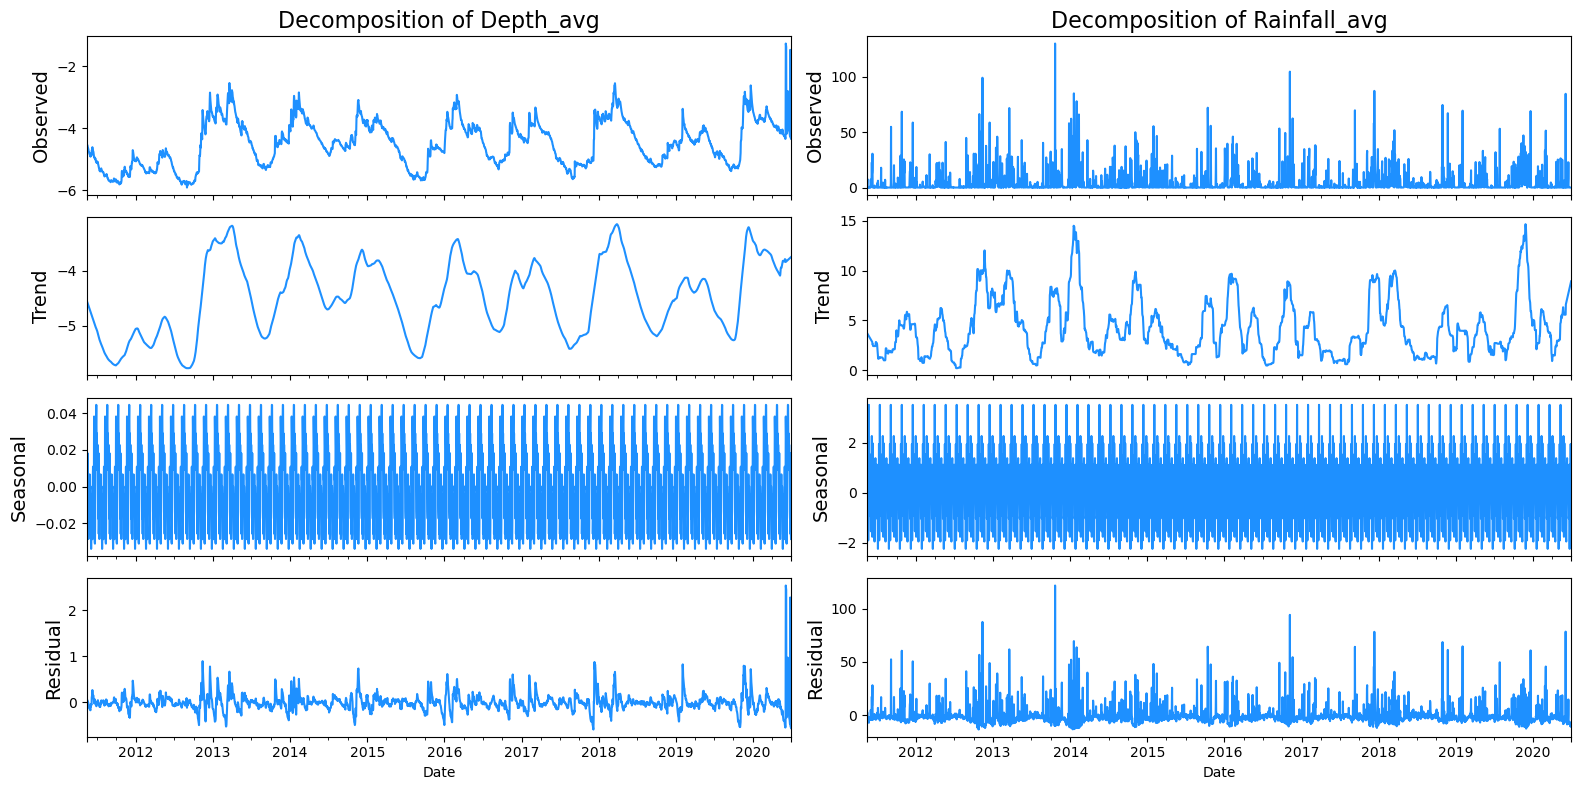

In [72]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['Depth_avg','Rainfall_avg']):
    
    res = seasonal_decompose(auser_avg[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.tight_layout()  # This might help with fitting everything into the figure nicely
plt.show()

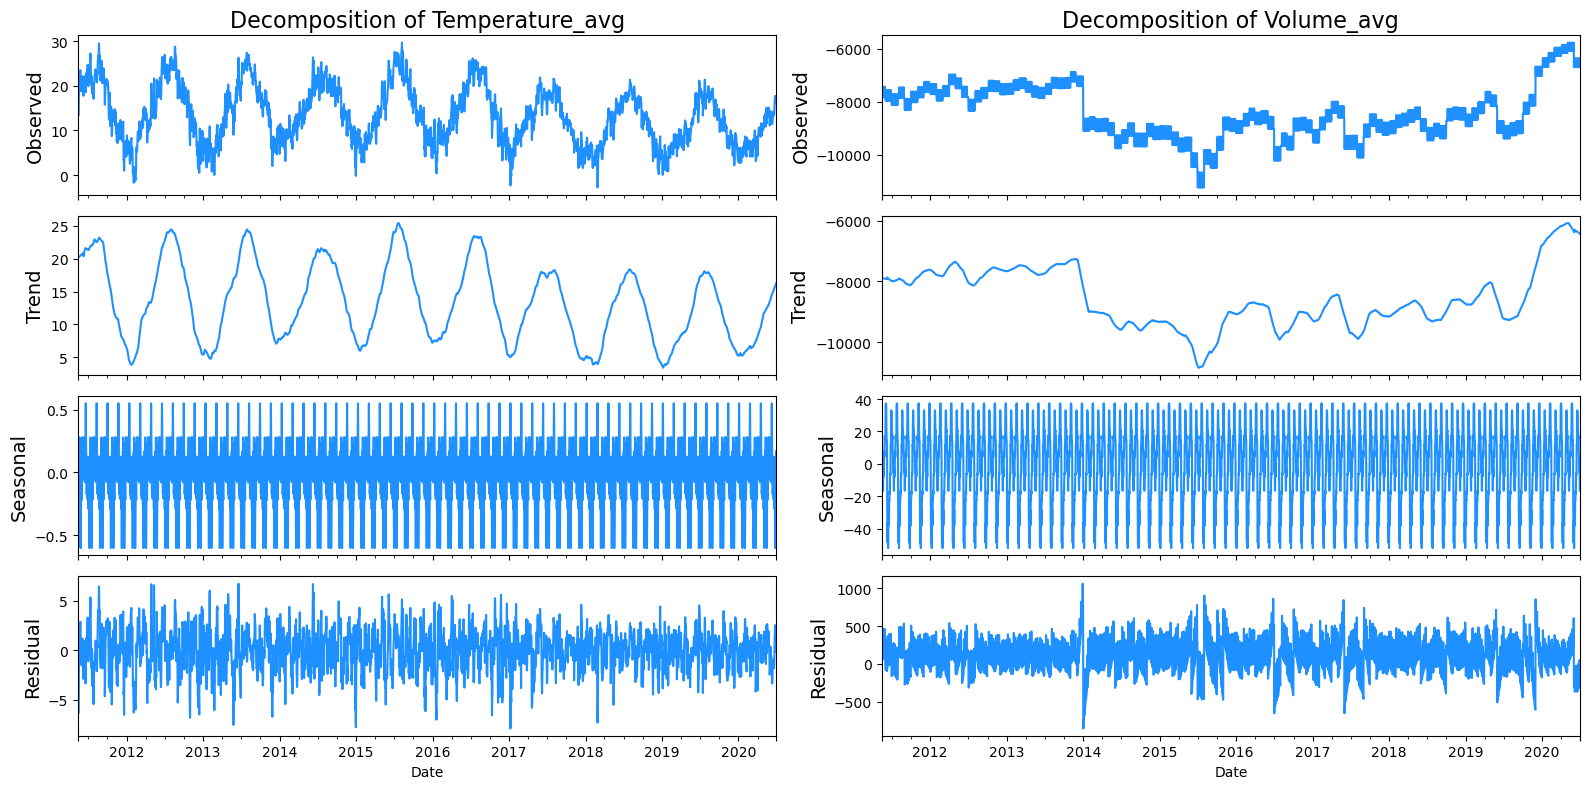

In [73]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['Temperature_avg','Volume_avg']):
    
    res = seasonal_decompose(auser_avg[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.tight_layout()  # This might help with fitting everything into the figure nicely
plt.show()

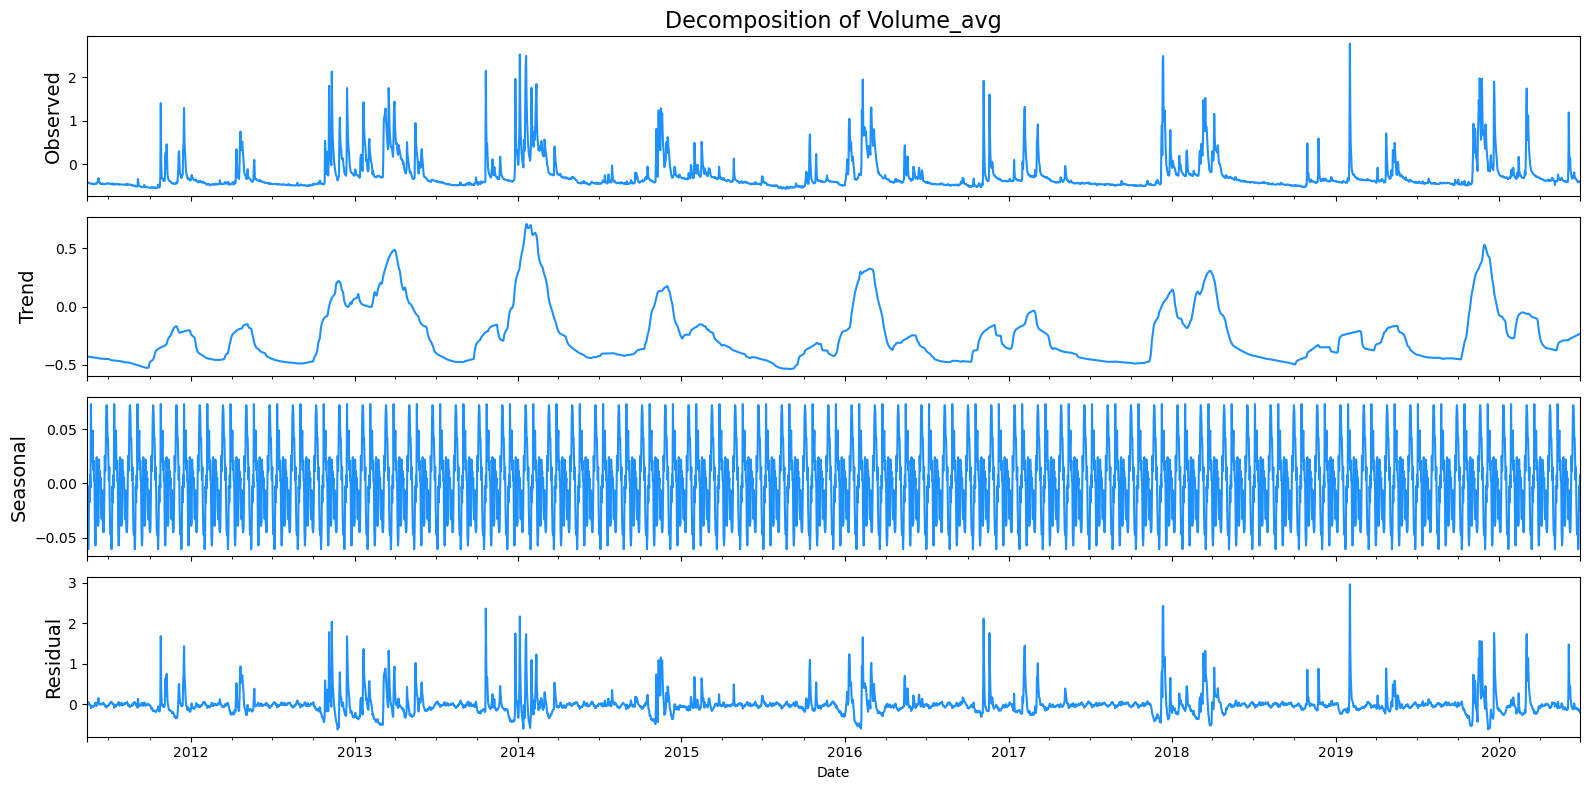

In [74]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(16,8))  # Adjusted figsize for better display
   
# No need to enumerate since we're plotting only one column
res = seasonal_decompose(auser_avg['Hydrometry_avg'], period=52, model='additive', extrapolate_trend='freq')

ax[0].set_title('Decomposition of {}'.format(column), fontsize=16)
res.observed.plot(ax=ax[0], legend=False, color='dodgerblue')
ax[0].set_ylabel('Observed', fontsize=14)

res.trend.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[1].set_ylabel('Trend', fontsize=14)

res.seasonal.plot(ax=ax[2], legend=False, color='dodgerblue')
ax[2].set_ylabel('Seasonal', fontsize=14)

res.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
ax[3].set_ylabel('Residual', fontsize=14)

plt.tight_layout()  # Helps with fitting everything into the figure nicely
plt.show()

### Lag

In [75]:
# Renaming columns by removing '_avg'
new_column_names = {col: col.replace('_avg', '') for col in auser_avg.columns}
auser_avg_renamed = auser_avg.rename(columns=new_column_names)

# Creating a copy of the DataFrame
auser_avg2 = auser_avg_renamed.copy()

# Displaying the modified DataFrame for verification
print("Modified DataFrame (auser_avg2):")

Modified DataFrame (auser_avg2):


### EDA

## Please comment on the work from hear down or I can work on the feedback thus far and see how much guidance is needed to complete this portion and get the data set ready for the split.

Text(0.5, 1.0, 'Correlation Matrix of Core Features')

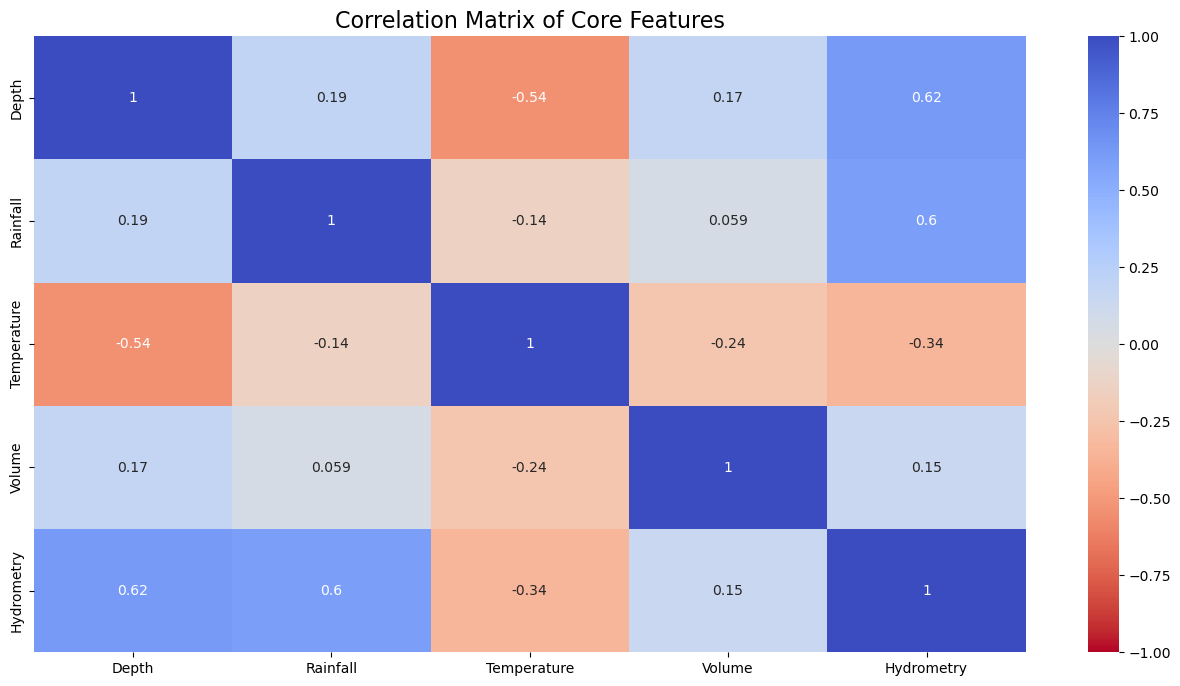

In [76]:
# Assuming auser_avg2 and core_columns are defined somewhere above this snippet.
core_columns =  ['Depth', 'Rainfall', 'Temperature', 
                 'Volume', 'Hydrometry']

f, ax = plt.subplots(figsize=(16, 8))  # Corrected for a single subplot

corrmat = auser_avg2[core_columns].corr()

# sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])  # Original line
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax)  # Corrected for a single subplot
ax.set_title('Correlation Matrix of Core Features', fontsize=16)


In [77]:
auser_avg2.head(2)

,Volume,Temperature,Rainfall,Depth,Hydrometry,Volume_log,Volume_diff_1,Depth_trend,Depth_seasonal,Rainfall_trend,Rainfall_seasonal,Temperature_trend,Temperature_seasonal,Volume_trend,Volume_seasonal,Hydrometry_trend,Hydrometry_seasonal
Date,,,,,,,,,,,,,,,,,
2011-05-14,-7827.32,17.12,0.00,-4.55,-0.43,8.97,0.00,-4.55,0.00,3.76,-2.24,20.12,-0.20,-7889.70,17.12,-0.43,-0.04
2011-05-15,-7435.96,13.26,5.18,-4.55,-0.42,8.91,391.37,-4.56,-0.01,3.72,-1.30,20.15,-0.60,-7891.01,7.17,-0.43,-0.05


In [78]:
#Renaming columns by removing '_avg'
new_column_names = {col: col.replace('_avg', '') for col in auser_avg.columns}
auser_avg_renamed = auser_avg.rename(columns=new_column_names)

# Creating a copy of the DataFrame
auser_avg3 = auser_avg_renamed.copy()

# Displaying the modified DataFrame for verification
print("Modified DataFrame (auser_avg2):")

Modified DataFrame (auser_avg2):


In [79]:
auser_avg3.head(3)

,Volume,Temperature,Rainfall,Depth,Hydrometry,Volume_log,Volume_diff_1,Depth_trend,Depth_seasonal,Rainfall_trend,Rainfall_seasonal,Temperature_trend,Temperature_seasonal,Volume_trend,Volume_seasonal,Hydrometry_trend,Hydrometry_seasonal
Date,,,,,,,,,,,,,,,,,
2011-05-14,-7827.32,17.12,0.00,-4.55,-0.43,8.97,0.00,-4.55,0.00,3.76,-2.24,20.12,-0.20,-7889.70,17.12,-0.43,-0.04
2011-05-15,-7435.96,13.26,5.18,-4.55,-0.42,8.91,391.37,-4.56,-0.01,3.72,-1.30,20.15,-0.60,-7891.01,7.17,-0.43,-0.05
2011-05-16,-7827.32,13.62,7.72,-4.54,-0.43,8.97,-391.37,-4.57,-0.02,3.68,1.12,20.18,-0.16,-7892.31,5.32,-0.43,-0.04


Column: Rainfall_seasonal, Lag: -4, Correlation: -0.1650076403817909
Column: Rainfall_seasonal, Lag: -2, Correlation: -0.3658794484782244
Column: Rainfall_seasonal, Lag: 0, Correlation: -0.0319646769600275
Column: Rainfall_seasonal, Lag: 1, Correlation: 0.24787917881994856
Column: Temperature_seasonal, Lag: -4, Correlation: -0.18521209898940272
Column: Temperature_seasonal, Lag: -2, Correlation: -0.12956992635782472
Column: Temperature_seasonal, Lag: 0, Correlation: -0.35184091506468035
Column: Temperature_seasonal, Lag: 1, Correlation: -0.2523322488380106
Column: Hydrometry_seasonal, Lag: -4, Correlation: -0.07469695989796263
Column: Hydrometry_seasonal, Lag: -2, Correlation: 0.04309921268300539
Column: Hydrometry_seasonal, Lag: 0, Correlation: 0.4952038914394747
Column: Hydrometry_seasonal, Lag: 1, Correlation: 0.5662100309312261


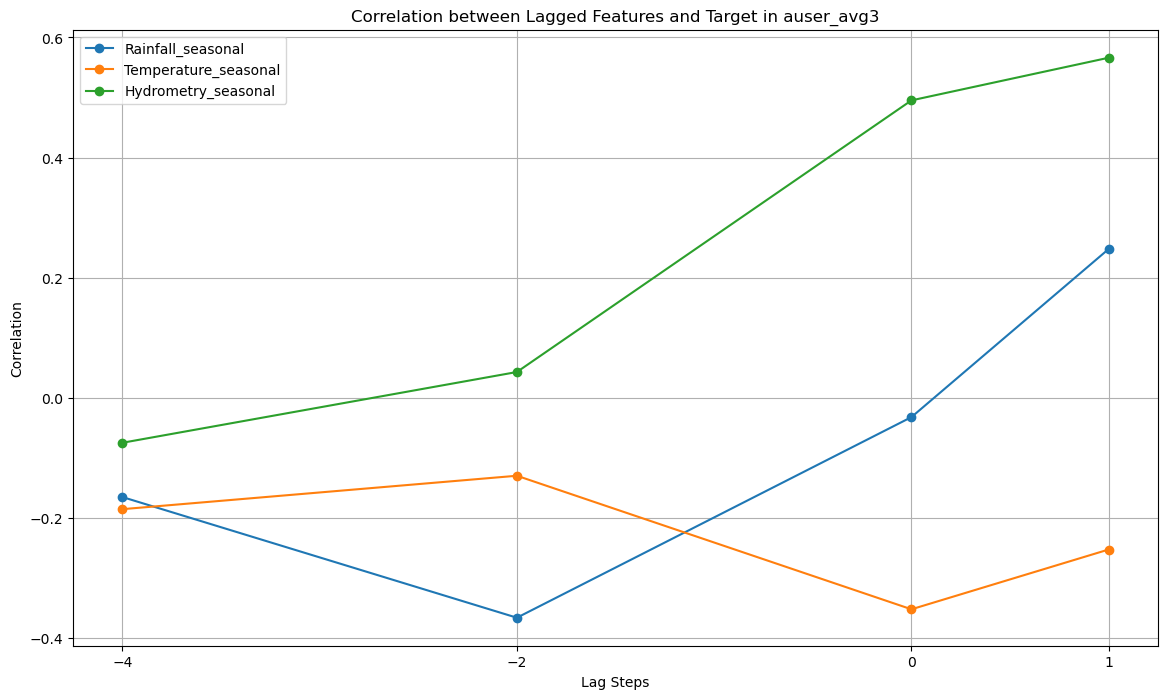

In [80]:
# Assuming auser_avg3 is your DataFrame and 'target_column' is your target
core_columns = ['Rainfall_seasonal', 'Temperature_seasonal', 'Hydrometry_seasonal']
num_lags = [-4, -2, 0, 1]  # List of lag values to iterate through

# Dictionary to store correlation results for plotting
correlation_results = {column: [] for column in core_columns}

for column in core_columns:
    for lag in num_lags:
        # Creating a new lagged column for the current column and lag value
        lagged_column_name = f'{column}_lag_{lag}'
        auser_avg3[lagged_column_name] = auser_avg3[column].shift(lag)
        
        # Calculating correlation with the target feature
        correlation = auser_avg3[[lagged_column_name, 'Depth_seasonal']].corr().iloc[0, 1]
        correlation_results[column].append((lag, correlation))
        
        # Optional: print the correlation for the current column and lag
        print(f'Column: {column}, Lag: {lag}, Correlation: {correlation}')

# Plotting
plt.figure(figsize=(14, 8))
for column, correlations in correlation_results.items():
    lags, corrs = zip(*correlations)  # Unzipping the lag values and their corresponding correlations
    plt.plot(lags, corrs, marker='o', label=f'{column}')

plt.title('Correlation between Lagged Features and Target in auser_avg3')
plt.xlabel('Lag Steps')
plt.ylabel('Correlation')
plt.xticks(num_lags)
plt.legend()
plt.grid(True)
plt.show()

In [81]:
auser_avg3.head(3)

,Volume,Temperature,Rainfall,Depth,Hydrometry,Volume_log,Volume_diff_1,Depth_trend,Depth_seasonal,Rainfall_trend,Rainfall_seasonal,Temperature_trend,Temperature_seasonal,Volume_trend,Volume_seasonal,Hydrometry_trend,Hydrometry_seasonal,Rainfall_seasonal_lag_-4,Rainfall_seasonal_lag_-2,Rainfall_seasonal_lag_0,Rainfall_seasonal_lag_1,Temperature_seasonal_lag_-4,Temperature_seasonal_lag_-2,Temperature_seasonal_lag_0,Temperature_seasonal_lag_1,Hydrometry_seasonal_lag_-4,Hydrometry_seasonal_lag_-2,Hydrometry_seasonal_lag_0,Hydrometry_seasonal_lag_1
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-05-14,-7827.32,17.12,0.00,-4.55,-0.43,8.97,0.00,-4.55,0.00,3.76,-2.24,20.12,-0.20,-7889.70,17.12,-0.43,-0.04,-0.17,1.12,-2.24,NaN,0.03,-0.16,-0.20,NaN,-0.05,-0.04,-0.04,NaN
2011-05-15,-7435.96,13.26,5.18,-4.55,-0.42,8.91,391.37,-4.56,-0.01,3.72,-1.30,20.15,-0.60,-7891.01,7.17,-0.43,-0.05,1.94,-1.05,-1.30,-2.24,0.10,-0.19,-0.60,-0.20,-0.00,-0.06,-0.05,-0.04
2011-05-16,-7827.32,13.62,7.72,-4.54,-0.43,8.97,-391.37,-4.57,-0.02,3.68,1.12,20.18,-0.16,-7892.31,5.32,-0.43,-0.04,-1.90,-0.17,1.12,-1.30,0.17,0.03,-0.16,-0.60,-0.02,-0.05,-0.04,-0.05


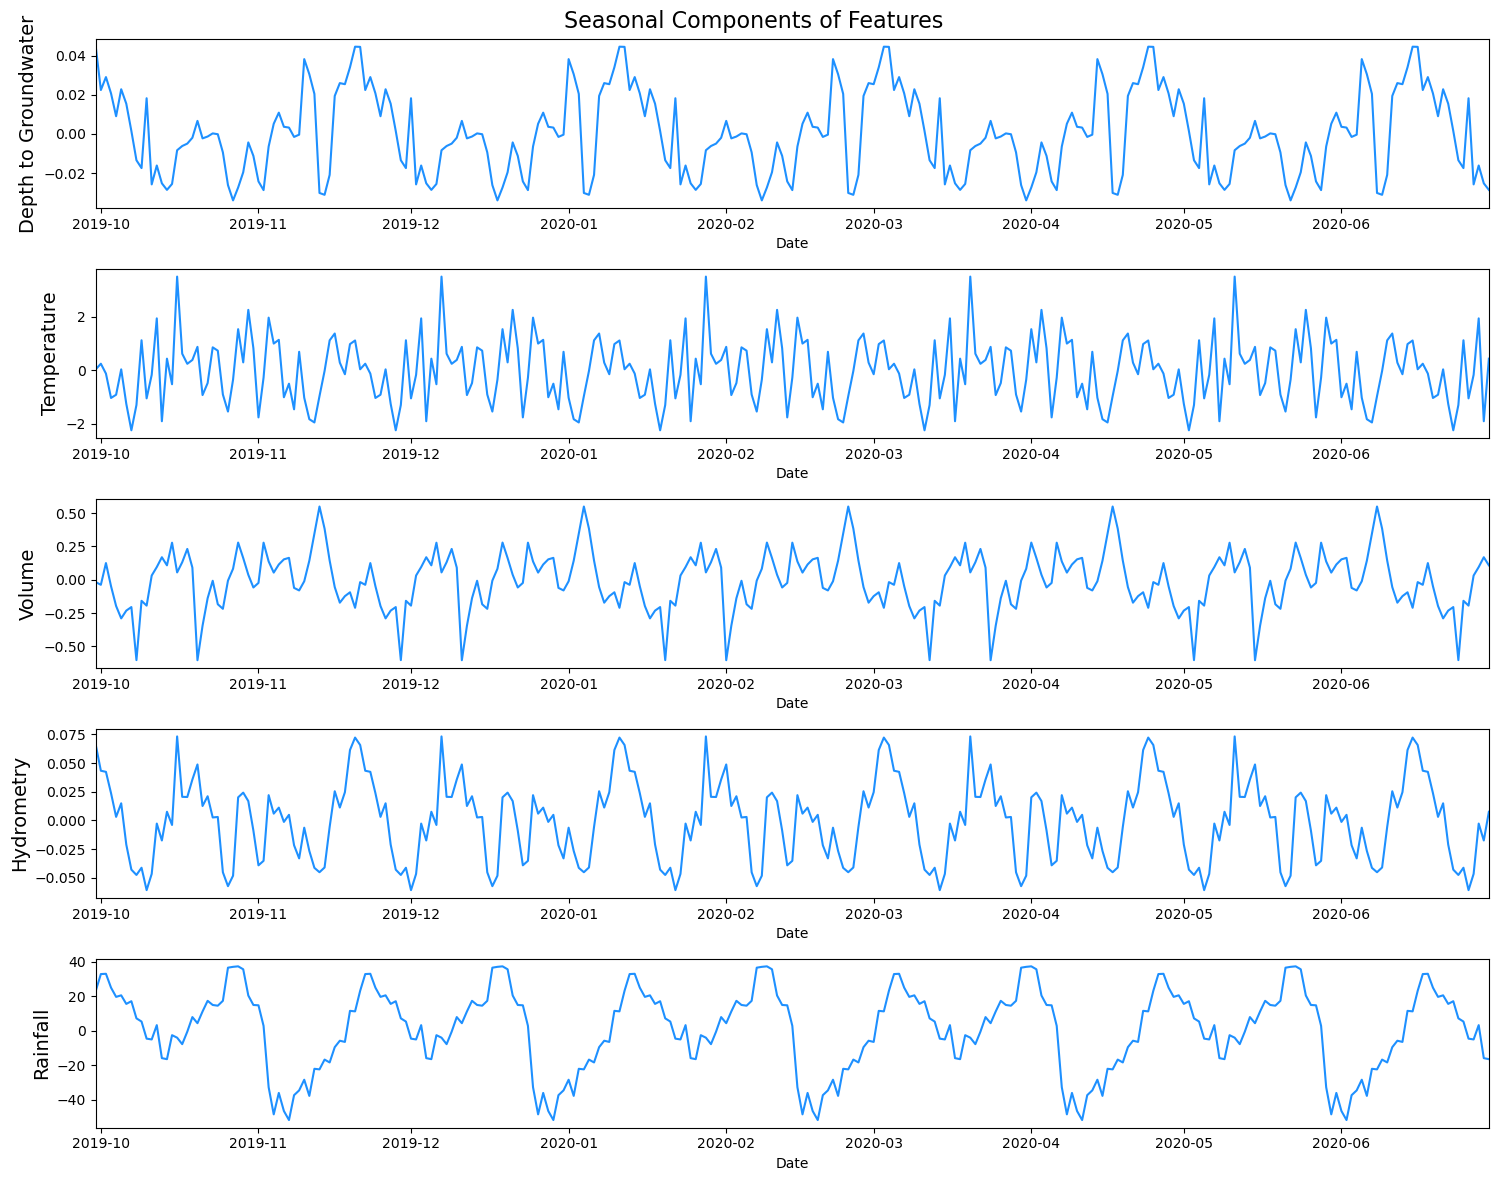

In [82]:
from datetime import date

# Assuming auser_avg2 is a DataFrame with 'Date' as index and it's already defined

f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

sns.lineplot(x=auser_avg2.index, y=auser_avg2['Depth_seasonal'], ax=ax[0], color='dodgerblue')
ax[0].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

sns.lineplot(x=auser_avg2.index, y=auser_avg2['Rainfall_seasonal'], ax=ax[1], color='dodgerblue')
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)

sns.lineplot(x=auser_avg2.index, y=auser_avg2['Temperature_seasonal'], ax=ax[2], color='dodgerblue')
ax[2].set_ylabel(ylabel='Volume', fontsize=14)

sns.lineplot(x=auser_avg2.index, y=auser_avg2['Hydrometry_seasonal'], ax=ax[3], color='dodgerblue')
ax[3].set_ylabel(ylabel='Hydrometry', fontsize=14)

sns.lineplot(x=auser_avg2.index, y=auser_avg2['Volume_seasonal'], ax=ax[4], color='dodgerblue')
ax[4].set_ylabel(ylabel='Rainfall', fontsize=14)

for i in range(5):
    ax[i].set_xlim([date(2019, 9, 30), date(2020, 6, 30)]) # 2017, 9, 30
plt.tight_layout()
plt.show()


Seems like many of the features are varying on a similar trend of about every 2 months

Text(0.5, 1.0, 'Correlation Matrix of Core Features')

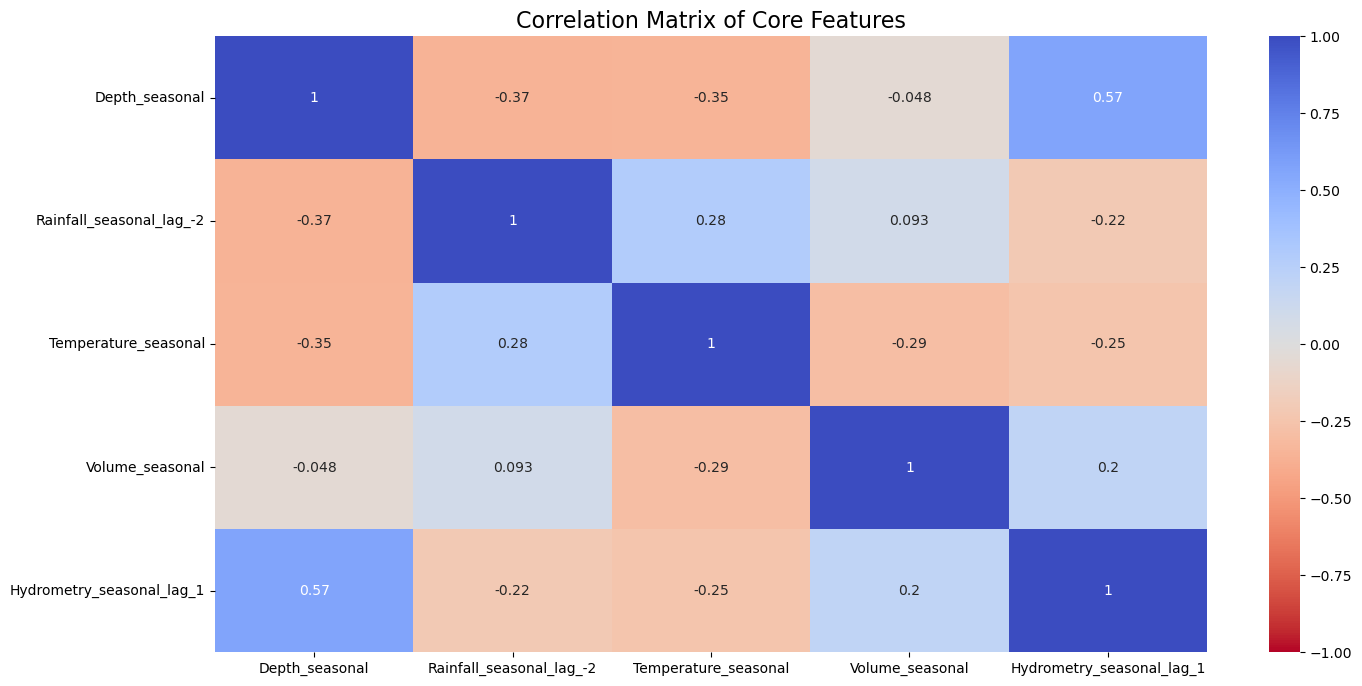

In [83]:
# Assuming auser_avg2 and core_columns are defined somewhere above this snippet.
core_columns =  ['Depth_seasonal', 'Rainfall_seasonal_lag_-2', 'Temperature_seasonal', 
                 'Volume_seasonal', 'Hydrometry_seasonal_lag_1']

f, ax = plt.subplots(figsize=(16, 8))  # Corrected for a single subplot

corrmat = auser_avg3[core_columns].corr()

# sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])  # Original line
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax)  # Corrected for a single subplot
ax.set_title('Correlation Matrix of Core Features', fontsize=16)

It seems that creating laging features to align with seasonality does not improve correlation between the features and target variable.

### Autocorrelation Analysis

* **Autocorrelation Function (ACF)**: P = Periods to lag for eg: (if P= 3 then we will use the three previous periods of our time series in the autoregressive portion of the calculation) P helps adjust the line that is being fitted to forecast the series. P corresponds with MA parameter
* **Partial Autocorrelation Function (PACF)**: D = In an ARIMA model we transform a time series into stationary one(series without trend or seasonality) using differencing. D refers to the number of differencing transformations required by the time series to get stationary. D corresponds with AR parameter.

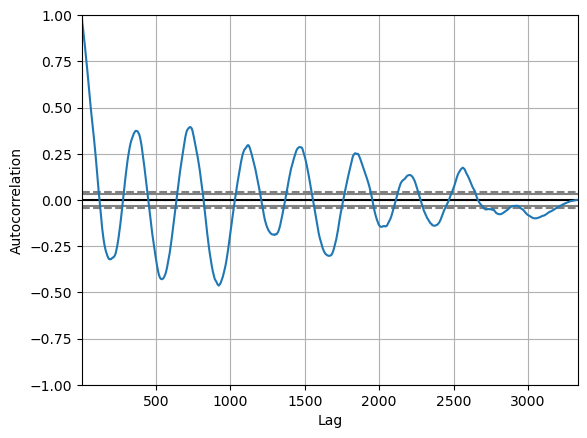

In [84]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(auser_avg2['Depth'])
plt.show()

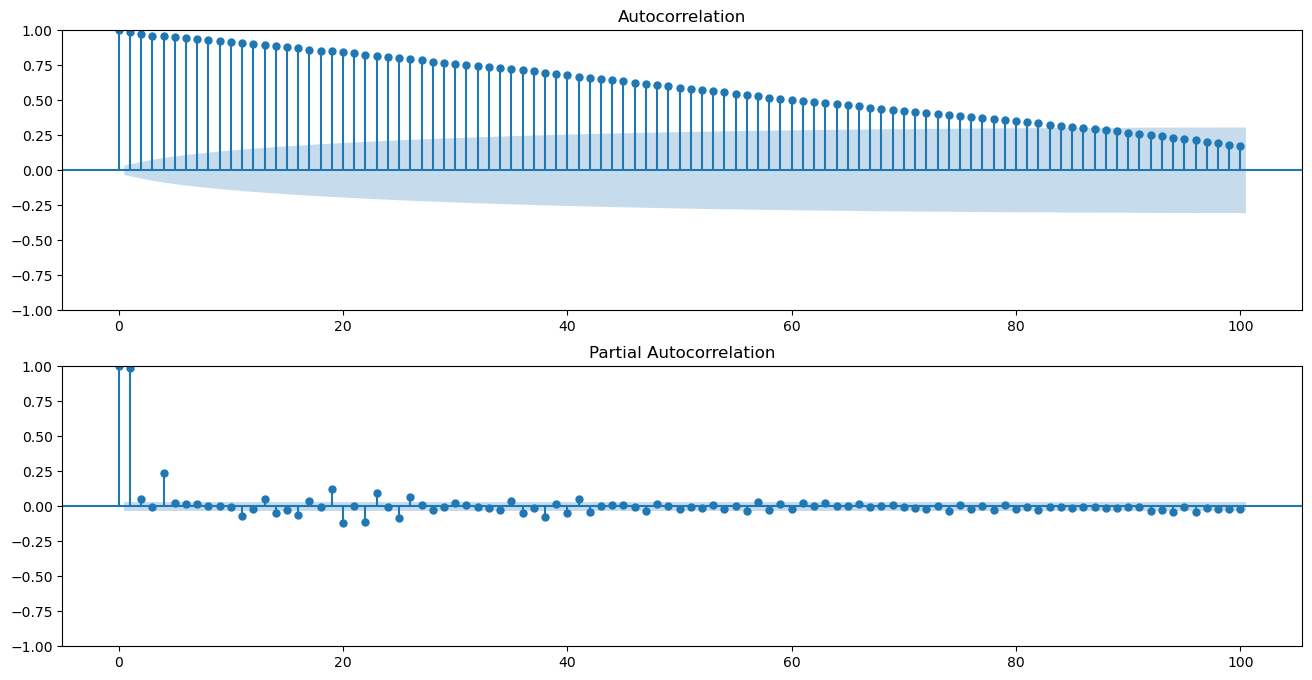

In [85]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(auser_avg2['Depth'], lags=100, ax=ax[0])
plot_pacf(auser_avg2['Depth'], lags=100, ax=ax[1])

plt.show()

Seens like this data set has a high overall autocorrelation that decreases over time. A time series with high autocorrelation that decreases over time indicates a strong relationship between an observation and its past values, but this relationship weakens as we look further into the past. On the other hand, a time series with very low to no partial correlation suggests that once we account for the influence of intermediate observations, the relationship between distant observations becomes negligible.

In [88]:
# Specify the suffixes to filter out
suffixes_to_drop = ['_trend', '_log', '_seasonal']

# Identifying columns to drop
columns_to_drop = [col for col in auser_avg2.columns if any(col.endswith(suffix) for suffix in suffixes_to_drop)]

# Dropping identified columns
df_filtered = auser_avg2.drop(columns=columns_to_drop)

# Copying the filtered DataFrame
auser_final = df_filtered.copy()

# convert the 'date' index to datetime format.
auser_final.index = pd.to_datetime(auser_final.index)

# Then, reset the index to move the 'date' from index to a column.
auser_final.reset_index(inplace=True)

# auser_final is now the DataFrame without the specified suffixes, ready for use.
auser_final.head(2)

,Date,Volume,Temperature,Rainfall,Depth,Hydrometry,Volume_diff_1
0,2011-05-14,-7827.32,17.12,0.00,-4.55,-0.43,0.00
1,2011-05-15,-7435.96,13.26,5.18,-4.55,-0.42,391.37


In [89]:
#Save the data frame for test / train split

# Specify just the file name
file_name = 'auser_final.csv'

# Save the DataFrame to a CSV file in the current directory
auser_final.to_csv(file_name, index=False)
print('File copied sucessfully.')

File copied sucessfully.


In [90]:
auser_final.tail(3)

,Date,Volume,Temperature,Rainfall,Depth,Hydrometry,Volume_diff_1
3333,2020-06-28,-6363.89,17.57,0.00,-4.30,-0.40,334.94
3334,2020-06-29,-6698.83,16.23,0.00,-4.30,-0.40,-334.94
3335,2020-06-30,-6698.83,17.22,0.00,-4.33,-0.42,0.00
